<h1 align=center><font size = 5>Best Neighborhood for Italian restaurant in Toronto</font></h1>

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1. <a href="#item1">Introduction and Business Problem</a>

2. <a href="#item4">Data</a>

3. <a href="#item5">Methodology and Analysis</a>   

4. <a href="#item5">Discussion and Conclusion</a> 


</font>
</div>

# 1. Introduction and Business Problem

The main objective of the project is to find the best location for a new, Italian restaurant in Toronto. This information can be useful for an enterpreneur based in Canada.

The location resolution will be by Neighborhood and the parameters I am going to observe in order to recommend the best option(s) are:
- number of restaurants nearby
- number of Italian restaurants nearby

I will be using an unsupervised Machine Learning technique called K-means in order to create groups of Neighborhoods based on the feature parameteres (number of restaurants).
I will also visualize the data just to get a whole picture about this topic.
This will give us a brief overview, where are the places which are not overcrowded with similar places like ours and where a profitable business can be established.

Of course there are other factors such as population, net income, number of tourists - just to name a few -, these parameters can be the subject of a potential model refining in the future.

# 2. Data

## 2.1 Description

I will use the following datasets:
- Foursquare API: 
    - restaurants within a certain radius of each neighborhood
    - Italian restaurants within a certain radius of each neighborhood
- Latitude/Longitude of Toronto Neighborhoods

## 2.2 Data Preparation

Let's import the necessary libraries:

In [4]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')


Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ------------------------------------------------------------
                       

In [5]:
#Importing geospatial data into dataframe
df_geo = pd.read_csv('http://cocl.us/Geospatial_data')
df_geo

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


In [6]:
#Scraping Toronto Neighborhoods from Wikipedia
from bs4 import BeautifulSoup
import lxml
source2 = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
soup2 = BeautifulSoup(source2,'lxml')
print(soup2.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of postal codes of Canada: M - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"XptG7wpAMNAAAUaw2@sAAAES","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_postal_codes_of_Canada:_M","wgTitle":"List of postal codes of Canada: M","wgCurRevisionId":951325562,"wgRevisionId":951325562,"wgArticleId":539066,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Communications in Ontario","Postal codes in Canada","Toronto","Ontario

In [7]:
#Filtering just for the table part of the Wiki page
My_table2 = soup2.find('table',{'class':'wikitable sortable'})
My_table2

<table class="wikitable sortable">
<tbody><tr>
<th>Postal code
</th>
<th>Borough
</th>
<th>Neighborhood
</th></tr>
<tr>
<td>M1A
</td>
<td>Not assigned
</td>
<td>
</td></tr>
<tr>
<td>M2A
</td>
<td>Not assigned
</td>
<td>
</td></tr>
<tr>
<td>M3A
</td>
<td>North York
</td>
<td>Parkwoods
</td></tr>
<tr>
<td>M4A
</td>
<td>North York
</td>
<td>Victoria Village
</td></tr>
<tr>
<td>M5A
</td>
<td>Downtown Toronto
</td>
<td>Regent Park / Harbourfront
</td></tr>
<tr>
<td>M6A
</td>
<td>North York
</td>
<td>Lawrence Manor / Lawrence Heights
</td></tr>
<tr>
<td>M7A
</td>
<td>Downtown Toronto
</td>
<td>Queen's Park / Ontario Provincial Government
</td></tr>
<tr>
<td>M8A
</td>
<td>Not assigned
</td>
<td>
</td></tr>
<tr>
<td>M9A
</td>
<td>Etobicoke
</td>
<td>Islington Avenue
</td></tr>
<tr>
<td>M1B
</td>
<td>Scarborough
</td>
<td>Malvern / Rouge
</td></tr>
<tr>
<td>M2B
</td>
<td>Not assigned
</td>
<td>
</td></tr>
<tr>
<td>M3B
</td>
<td>North York
</td>
<td>Don Mills
</td></tr>
<tr>
<td>M4B
</td>
<td>Ea

In [8]:
#creating the header from wikipedia data
tableheader2 = My_table2.find_all('th')
for i, head in enumerate(tableheader2): tableheader2[i]=str(tableheader2[i]).replace("<th>","").replace("</th>","").replace("\n","")
tableheader2

['Postal code', 'Borough', 'Neighborhood']

In [9]:
#Scraping data for the actual columns and putting the header and body into dataframe
table_rows2 = My_table2.find_all('tr')
data2 = []
for row2 in table_rows2:
    data2.append([t.text.strip() for t in row2.find_all('td')])

df_neigh = pd.DataFrame(data2, columns=tableheader2)
df_neigh

,Postal code,Borough,Neighborhood
0,None,None,None
1,M1A,Not assigned,
2,M2A,Not assigned,
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village
5,M5A,Downtown Toronto,Regent Park / Harbourfront
6,M6A,North York,Lawrence Manor / Lawrence Heights
7,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government
8,M8A,Not assigned,
9,M9A,Etobicoke,Islington Avenue


In [10]:
#drop 'Not assigned' values from Borough column
df_neigh = df_neigh.drop(df_neigh[(df_neigh.Borough == "Not assigned")].index)
df_neigh

,Postal code,Borough,Neighborhood
0,None,None,None
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village
5,M5A,Downtown Toronto,Regent Park / Harbourfront
6,M6A,North York,Lawrence Manor / Lawrence Heights
7,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government
9,M9A,Etobicoke,Islington Avenue
10,M1B,Scarborough,Malvern / Rouge
12,M3B,North York,Don Mills
13,M4B,East York,Parkview Hill / Woodbine Gardens


In [11]:
#replacing " /" with "," in Neighborhood column
df_neigh['Neighborhood']=df_neigh['Neighborhood'].str.replace(" /",",")
df_neigh = df_neigh.drop([0])
df_neigh

,Postal code,Borough,Neighborhood
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village
5,M5A,Downtown Toronto,"Regent Park, Harbourfront"
6,M6A,North York,"Lawrence Manor, Lawrence Heights"
7,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
9,M9A,Etobicoke,Islington Avenue
10,M1B,Scarborough,"Malvern, Rouge"
12,M3B,North York,Don Mills
13,M4B,East York,"Parkview Hill, Woodbine Gardens"
14,M5B,Downtown Toronto,"Garden District, Ryerson"


In [12]:
#checking 'Neighborhood' column for 'Not assigned' values
df2 = df_neigh[df_neigh['Neighborhood']=='Not assigned']
if df2.empty:
    print("there is no 'Not assigned' Neighborhood")
else: df2

there is no 'Not assigned' Neighborhood


In [13]:
df_neigh.shape

(103, 3)

In [14]:
#merging two dataframes
df_neigh = df_neigh.merge(df_geo, left_on='Postal code', right_on='Postal Code', how='left').drop('Postal Code',axis=1)
df_neigh.head()

,Postal code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [15]:
df_neigh.shape

(103, 5)

In [16]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(df_neigh['Borough'].unique()),
        df_neigh.shape[0]
    )
)

The dataframe has 10 boroughs and 103 neighborhoods.


In [101]:
#filtering just for 'Toronto' Boroughs
df_tor = df_neigh[df_neigh['Borough'].str.contains('Toronto')]
df_tor.head()

,Postal code,Borough,Neighborhood,Latitude,Longitude
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
19,M4E,East Toronto,The Beaches,43.676357,-79.293031


In [18]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(df_tor['Borough'].unique()),
        df_tor.shape[0]
    )
)

The dataframe has 4 boroughs and 39 neighborhoods.


In [19]:
#Checking the counts of Neighborhoods per Borough
df_tor.groupby('Borough').count()['Neighborhood']

Borough
Central Toronto      9
Downtown Toronto    19
East Toronto         5
West Toronto         6
Name: Neighborhood, dtype: int64

In [20]:
#Define Toronto geographical parameters as mean of Latitude/Longitude values (for the sake of simplicity)
lat_toronto = df_tor['Latitude'].mean()
lon_toronto = df_tor['Longitude'].mean()
print('The geographical coordinates of Toronto are {}, {}'.format(lat_toronto, lon_toronto))

The geographical coordinates of Toronto are 43.66713498717949, -79.38987324871795


In [23]:
CLIENT_ID = 'YGBAHPIDYPTWOC0X2COC3P1FXTB3Q3OEQ5ZD3DHJ4KTM1HBB' #  Foursquare ID
CLIENT_SECRET = 'ZU4EPYA51JOUHKWLH44JEGIYRF2CHI55JHEZFTFCA3N55SEO' #  Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('My credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

My credentails:
CLIENT_ID: YGBAHPIDYPTWOC0X2COC3P1FXTB3Q3OEQ5ZD3DHJ4KTM1HBB
CLIENT_SECRET:ZU4EPYA51JOUHKWLH44JEGIYRF2CHI55JHEZFTFCA3N55SEO


In [24]:
#creating a function for venue exploration in Toronto
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
   
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [25]:
#Creating a new dataframe with the venues
LIMIT = 100
radius = 500
toronto_venues = getNearbyVenues(names=df_tor['Neighborhood'],
                                   latitudes=df_tor['Latitude'],
                                   longitudes=df_tor['Longitude'],
                                   radius = radius
                                  )

Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
The Danforth West, Riverdale
Toronto Dominion Centre, Design Exchange
Brockton, Parkdale Village, Exhibition Place
India Bazaar, The Beaches West
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West
High Park, The Junction South
North Toronto West
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
University of Toronto, Harbord
Runnymede, Swansea
Moore Park, Summerhill East
Kensington Market, Chinatown, Grange Park
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Rosedale
Stn A PO Boxes
St. James Town,

In [26]:
toronto_venues.shape

(1612, 7)

In [27]:
toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
1,"Regent Park, Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park, Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,"Regent Park, Harbourfront",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
4,"Regent Park, Harbourfront",43.65426,-79.360636,Morning Glory Cafe,43.653947,-79.361149,Breakfast Spot


In [28]:
#Counting venues by Neighborhood
toronto_venues.groupby('Neighborhood').count()['Venue'].sort_values(ascending=False)

Neighborhood
Toronto Dominion Centre, Design Exchange                                                                      100
Commerce Court, Victoria Hotel                                                                                100
First Canadian Place, Underground city                                                                        100
Garden District, Ryerson                                                                                      100
Harbourfront East, Union Station, Toronto Islands                                                             100
Stn A PO Boxes                                                                                                 96
Richmond, Adelaide, King                                                                                       93
St. James Town                                                                                                 84
Church and Wellesley                                                       

In [29]:
#Displaying the unique venue categories
toronto_venues['Venue Category'].unique()[:100]

array(['Bakery', 'Coffee Shop', 'Distribution Center', 'Spa',
       'Breakfast Spot', 'Restaurant', 'Park', 'Historic Site', 'Pub',
       'Farmers Market', 'Chocolate Shop', 'Dessert Shop', 'Theater',
       'Performing Arts Venue', 'Gym / Fitness Center',
       'French Restaurant', 'Café', 'Mexican Restaurant', 'Event Space',
       'Yoga Studio', 'Ice Cream Shop', 'Asian Restaurant', 'Shoe Store',
       'Art Gallery', 'Cosmetics Shop', 'Electronics Store', 'Bank',
       'Beer Store', 'Hotel', 'Health Food Store', 'Antique Shop',
       'Italian Restaurant', 'Beer Bar', 'Sushi Restaurant', 'Creperie',
       'Arts & Crafts Store', 'Burrito Place', 'Diner', 'Hobby Shop',
       'Discount Store', 'Fried Chicken Joint', 'Burger Joint',
       'Juice Bar', 'Sandwich Place', 'Gym', 'College Auditorium', 'Bar',
       'College Cafeteria', 'Clothing Store', 'Comic Shop', 'Plaza',
       'Tea Room', 'Music Venue', 'Ramen Restaurant', 'Thai Restaurant',
       'Steakhouse', 'Sporting Good

In [33]:
toronto_venues[(toronto_venues['Venue Category'].str.contains('Restaurant', regex=False))].groupby('Neighborhood').count()['Venue']

Neighborhood
Berczy Park                                                          15
Brockton, Parkdale Village, Exhibition Place                          2
Business reply mail Processing CentrE                                 2
Central Bay Street                                                   18
Christie                                                              2
Church and Wellesley                                                 23
Commerce Court, Victoria Hotel                                       30
Davisville                                                           10
Dufferin, Dovercourt Village                                          1
First Canadian Place, Underground city                               31
Forest Hill North & West                                              1
Garden District, Ryerson                                             24
Harbourfront East, Union Station, Toronto Islands                    15
High Park, The Junction South                      

In [103]:
#Creating a dataframe for restaurants by Neighborhood
toronto_restaurant = toronto_venues[(toronto_venues['Venue Category'].str.contains('Restaurant', regex=False))].groupby(['Neighborhood']).count()
toronto_restaurant.drop(['Neighborhood Latitude','Neighborhood Longitude','Venue','Venue Latitude','Venue Longitude'],axis=1,inplace=True)
toronto_restaurant.rename(columns={'Venue Category':'Number of restaurants'},inplace=True)
toronto_restaurant.head()

,Number of restaurants
Neighborhood,
Berczy Park,15
"Brockton, Parkdale Village, Exhibition Place",2
Business reply mail Processing CentrE,2
Central Bay Street,18
Christie,2


In [37]:
#Counting the Italian restaurants by Neighborhood
toronto_venues[(toronto_venues['Venue Category'].str.contains('Italian Restaurant', regex=False))].groupby('Neighborhood').count()['Venue']

Neighborhood
Berczy Park                                          2
Brockton, Parkdale Village, Exhibition Place         1
Central Bay Street                                   4
Christie                                             1
Church and Wellesley                                 1
Commerce Court, Victoria Hotel                       3
Davisville                                           2
First Canadian Place, Underground city               2
Garden District, Ryerson                             2
Harbourfront East, Union Station, Toronto Islands    4
High Park, The Junction South                        1
India Bazaar, The Beaches West                       1
Kensington Market, Chinatown, Grange Park            1
Little Portugal, Trinity                             1
Parkdale, Roncesvalles                               1
Queen's Park, Ontario Provincial Government          1
Runnymede, Swansea                                   2
St. James Town                                      

In [104]:
#Creating a dataframe for just the Italian restaurants by Neighborhood
toronto_it_restaurant = toronto_venues[(toronto_venues['Venue Category'].str.contains('Italian Restaurant', regex=False))].groupby(['Neighborhood']).count()
toronto_it_restaurant.drop(['Neighborhood Latitude','Neighborhood Longitude','Venue','Venue Latitude','Venue Longitude'],axis=1,inplace=True)
toronto_it_restaurant.rename(columns={'Venue Category':'Number of Italian restaurants'},inplace=True)
toronto_it_restaurant.head()

,Number of Italian restaurants
Neighborhood,
Berczy Park,2
"Brockton, Parkdale Village, Exhibition Place",1
Central Bay Street,4
Christie,1
Church and Wellesley,1


In [105]:
df_tor.set_index(['Neighborhood'],inplace=True)
df_tor

,Postal code,Borough,Latitude,Longitude
Neighborhood,,,,
"Regent Park, Harbourfront",M5A,Downtown Toronto,43.654260,-79.360636
"Queen's Park, Ontario Provincial Government",M7A,Downtown Toronto,43.662301,-79.389494
"Garden District, Ryerson",M5B,Downtown Toronto,43.657162,-79.378937
St. James Town,M5C,Downtown Toronto,43.651494,-79.375418
The Beaches,M4E,East Toronto,43.676357,-79.293031
Berczy Park,M5E,Downtown Toronto,43.644771,-79.373306
Central Bay Street,M5G,Downtown Toronto,43.657952,-79.387383
Christie,M6G,Downtown Toronto,43.669542,-79.422564
"Richmond, Adelaide, King",M5H,Downtown Toronto,43.650571,-79.384568


In [118]:
#Creating a new dataframe by merging Toronto Neighborhood data and venue data (restaurants, Italian restaurants)
df = pd.concat([df_tor,toronto_restaurant,toronto_it_restaurant],axis=1,sort=False)
df

,Postal code,Borough,Latitude,Longitude,Number of restaurants,Number of Italian restaurants
"Regent Park, Harbourfront",M5A,Downtown Toronto,43.654260,-79.360636,5.0,NaN
"Queen's Park, Ontario Provincial Government",M7A,Downtown Toronto,43.662301,-79.389494,5.0,1.0
"Garden District, Ryerson",M5B,Downtown Toronto,43.657162,-79.378937,24.0,2.0
St. James Town,M5C,Downtown Toronto,43.651494,-79.375418,23.0,3.0
The Beaches,M4E,East Toronto,43.676357,-79.293031,NaN,NaN
Berczy Park,M5E,Downtown Toronto,43.644771,-79.373306,15.0,2.0
Central Bay Street,M5G,Downtown Toronto,43.657952,-79.387383,18.0,4.0
Christie,M6G,Downtown Toronto,43.669542,-79.422564,2.0,1.0
"Richmond, Adelaide, King",M5H,Downtown Toronto,43.650571,-79.384568,25.0,NaN
"Dufferin, Dovercourt Village",M6H,West Toronto,43.669005,-79.442259,1.0,NaN


In [119]:
#Giving a zero value for NaN values in order to have just numeric data - this is critical for clustering
df = df.fillna(0)
df

,Postal code,Borough,Latitude,Longitude,Number of restaurants,Number of Italian restaurants
"Regent Park, Harbourfront",M5A,Downtown Toronto,43.654260,-79.360636,5.0,0.0
"Queen's Park, Ontario Provincial Government",M7A,Downtown Toronto,43.662301,-79.389494,5.0,1.0
"Garden District, Ryerson",M5B,Downtown Toronto,43.657162,-79.378937,24.0,2.0
St. James Town,M5C,Downtown Toronto,43.651494,-79.375418,23.0,3.0
The Beaches,M4E,East Toronto,43.676357,-79.293031,0.0,0.0
Berczy Park,M5E,Downtown Toronto,43.644771,-79.373306,15.0,2.0
Central Bay Street,M5G,Downtown Toronto,43.657952,-79.387383,18.0,4.0
Christie,M6G,Downtown Toronto,43.669542,-79.422564,2.0,1.0
"Richmond, Adelaide, King",M5H,Downtown Toronto,43.650571,-79.384568,25.0,0.0
"Dufferin, Dovercourt Village",M6H,West Toronto,43.669005,-79.442259,1.0,0.0


In [120]:
df = df.reset_index()
df = df.rename(columns={'index':'Neighborhood'})
df.head()

,Neighborhood,Postal code,Borough,Latitude,Longitude,Number of restaurants,Number of Italian restaurants
0,"Regent Park, Harbourfront",M5A,Downtown Toronto,43.654260,-79.360636,5.0,0.0
1,"Queen's Park, Ontario Provincial Government",M7A,Downtown Toronto,43.662301,-79.389494,5.0,1.0
2,"Garden District, Ryerson",M5B,Downtown Toronto,43.657162,-79.378937,24.0,2.0
3,St. James Town,M5C,Downtown Toronto,43.651494,-79.375418,23.0,3.0
4,The Beaches,M4E,East Toronto,43.676357,-79.293031,0.0,0.0


# 3. Methodology and Analysis

## 3.1 EDA - Explaratory Data Analysis

In [121]:
#getting basic statistics of our dataframe
df.describe()

,Latitude,Longitude,Number of restaurants,Number of Italian restaurants
count,39.000000,39.000000,39.000000,39.000000
mean,43.667135,-79.389873,10.128205,1.230769
std,0.023478,0.037451,9.682267,1.327077
min,43.628947,-79.484450,0.000000,0.000000
25%,43.649765,-79.405678,2.000000,0.000000
50%,43.662301,-79.387383,7.000000,1.000000
75%,43.677957,-79.376474,16.000000,2.000000
max,43.728020,-79.293031,31.000000,5.000000


In [129]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[lat_toronto, lon_toronto], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(df['Latitude'], df['Longitude'], df['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='black',
        fill=True,
        fill_color='red',
        fill_opacity=0.5,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

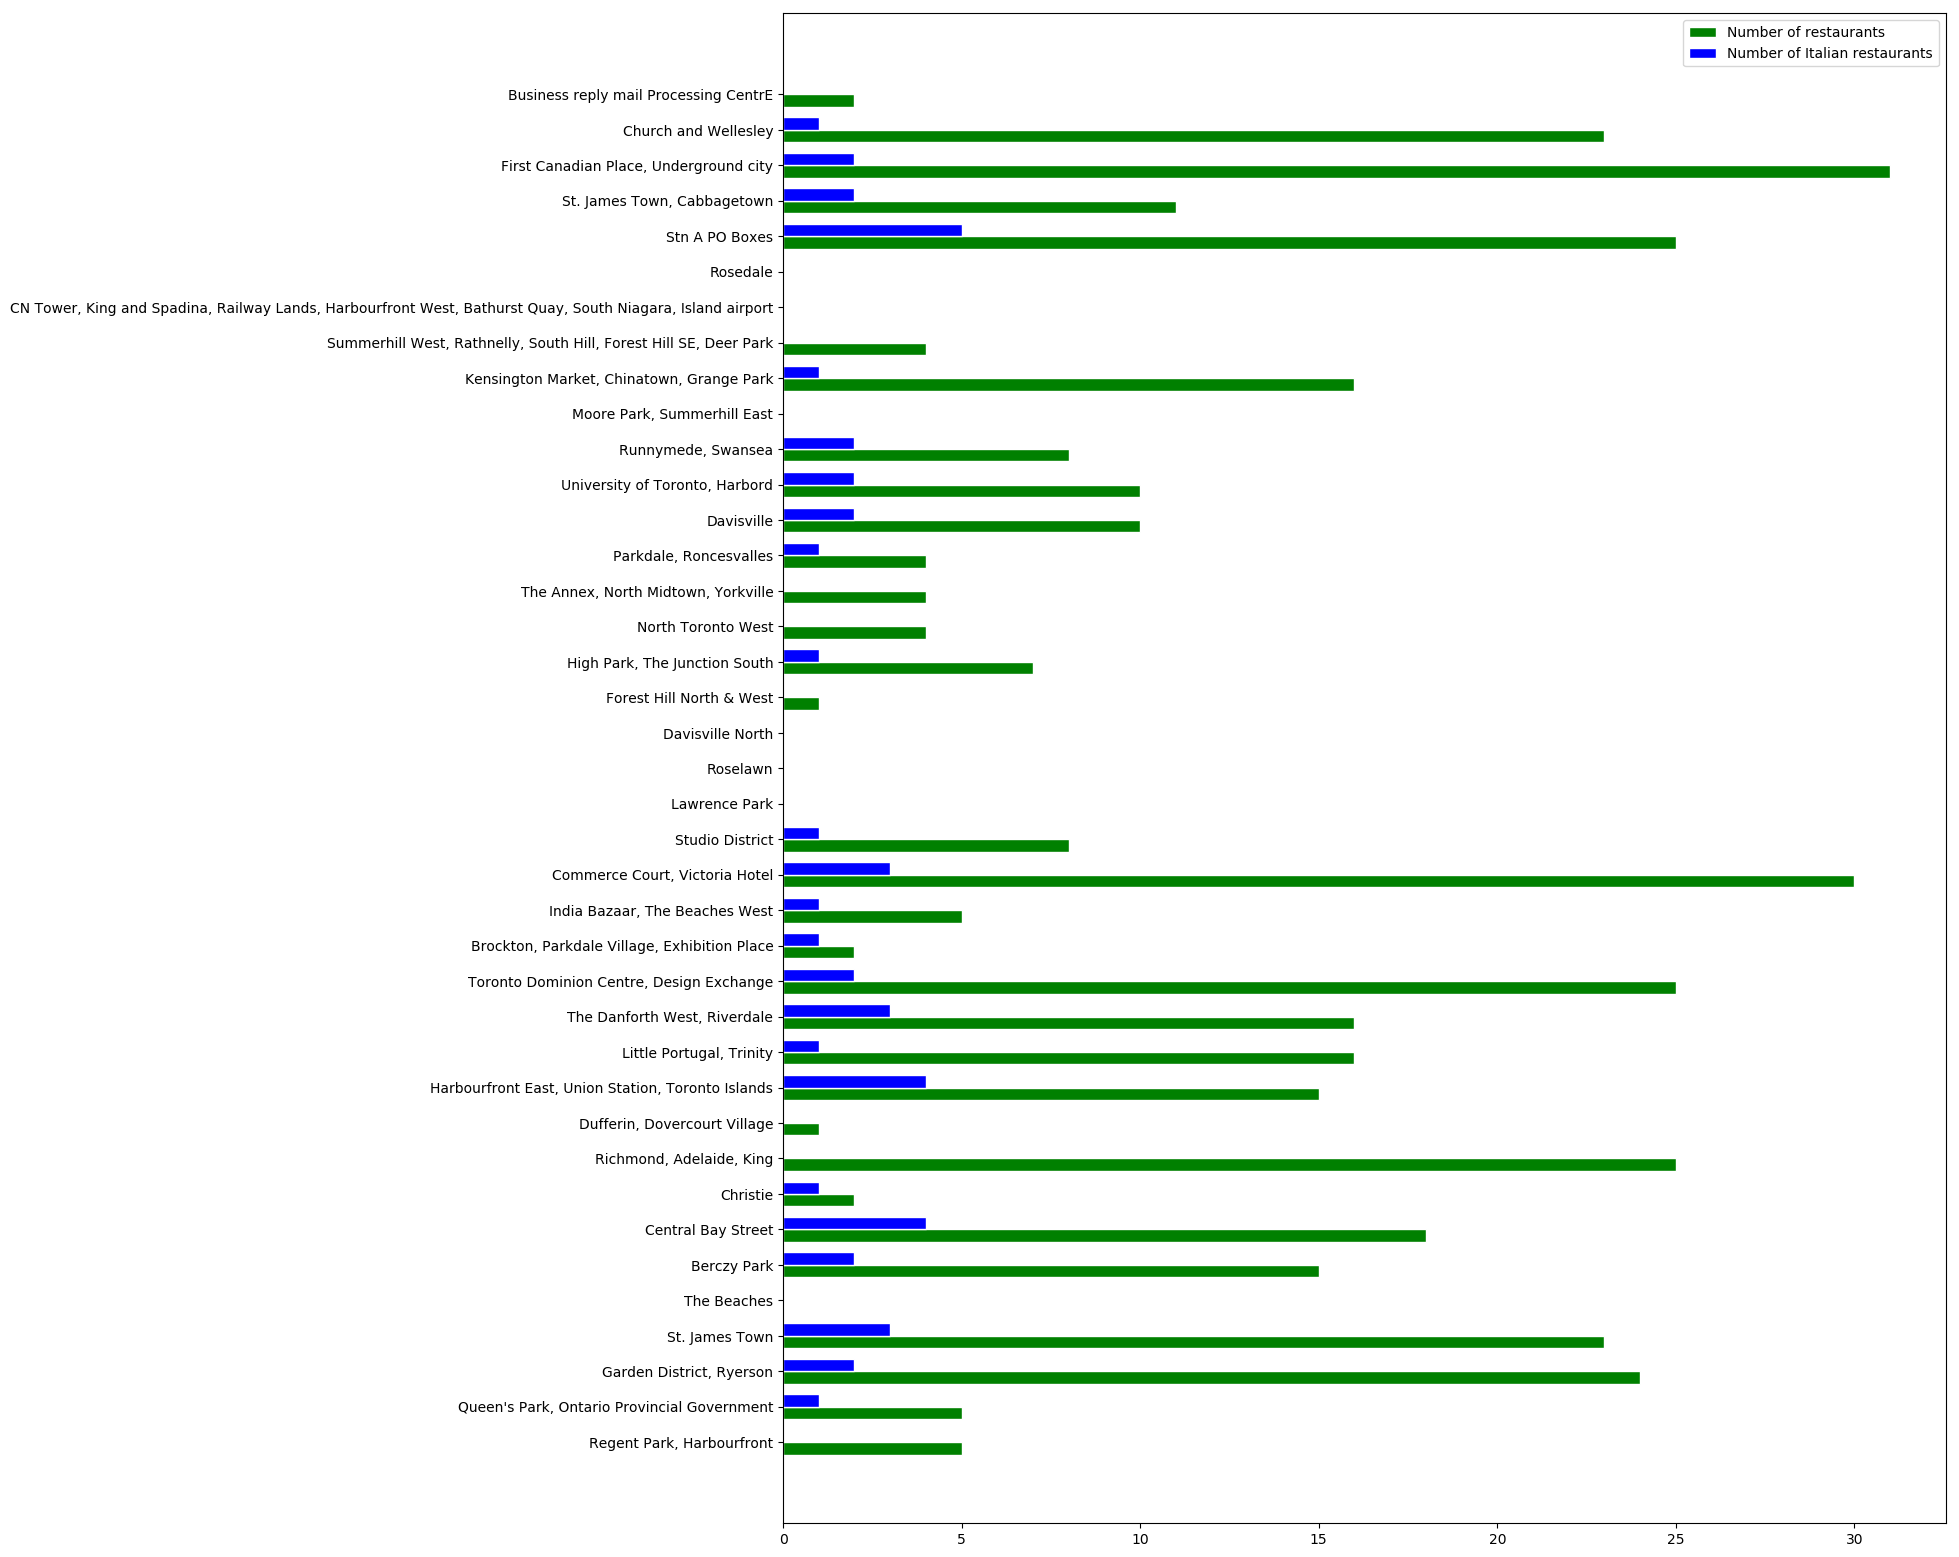

In [164]:
#visualizing the numbers of restaurants and Italian restaurants by plotting the dataframe information
fig, ax = plt.subplots(figsize=(15,20),dpi=100)
    
width = 0.35
ind = np.arange(len(df))

ax.barh(ind,df['Number of restaurants'],width,color='green',edgecolor='white',label='Number of restaurants')
ax.barh(ind+width,df['Number of Italian restaurants'],width,color='blue',edgecolor='white',label='Number of Italian restaurants')

ax.set_yticks(ind+width/2)
ax.set_yticklabels(df['Neighborhood'])
ax.legend(loc='best')
ax.autoscale_view()

plt.show()

## 3.2 Clustering and Analysis

Here I am using K-mean clustering method which is an unsupervised Machine Learning technique for defining categories in the data.

In [171]:
#creating a dataframe just for the clustering (we need only numbers)
df_clusters = df.drop(['Postal code','Borough','Latitude','Longitude','Neighborhood'],axis=1)
df_clusters.head()

,Number of restaurants,Number of Italian restaurants
0,5.0,0.0
1,5.0,1.0
2,24.0,2.0
3,23.0,3.0
4,0.0,0.0


In [179]:
df_clusters.shape

(39, 2)

In [181]:
#Preprocessing of the data by scaling with Standard Scaler method
from sklearn.preprocessing import StandardScaler
df_clusters = StandardScaler().fit_transform(df_clusters)
df_clusters

array([[-0.53657304, -0.93955235],
       [-0.53657304, -0.17616607],
       [ 1.45143009,  0.58722022],
       [ 1.34679834,  1.3506065 ],
       [-1.05973176, -0.93955235],
       [ 0.50974439,  0.58722022],
       [ 0.82363962,  2.11399279],
       [-0.85046828, -0.17616607],
       [ 1.55606183, -0.93955235],
       [-0.95510002, -0.93955235],
       [ 0.50974439,  2.11399279],
       [ 0.61437614, -0.17616607],
       [ 0.61437614,  1.3506065 ],
       [ 1.55606183,  0.58722022],
       [-0.85046828, -0.17616607],
       [-0.53657304, -0.17616607],
       [ 2.07922055,  1.3506065 ],
       [-0.22267781, -0.17616607],
       [-1.05973176, -0.93955235],
       [-1.05973176, -0.93955235],
       [-1.05973176, -0.93955235],
       [-0.95510002, -0.93955235],
       [-0.32730956, -0.17616607],
       [-0.64120479, -0.93955235],
       [-0.64120479, -0.93955235],
       [-0.64120479, -0.17616607],
       [-0.01341433,  0.58722022],
       [-0.01341433,  0.58722022],
       [-0.22267781,

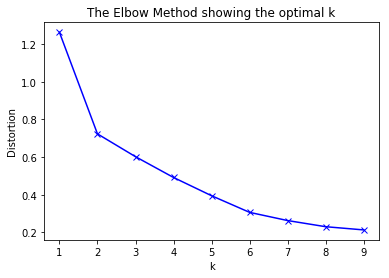

In [182]:
#using Elbow method in order to define optimal k value for clusterint (k will be the number of clusters)
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df_clusters)
    kmeanModel.fit(df_clusters)
    distortions.append(sum(np.min(cdist(df_clusters, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df_clusters.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [183]:
# set number of clusters based on the largest shift on the line (k should be 2)
kclusters = 2

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_clusters)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:40]

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0], dtype=int32)

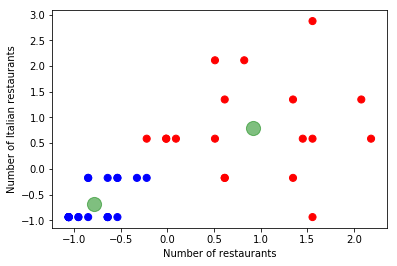

In [205]:
#Predicting and visualizing the clusters and their centroids
y_kmeans = kmeans.predict(df_clusters)
plt.scatter(df_clusters[:, 0], df_clusters[:, 1], c=y_kmeans, s=50, cmap='bwr')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='green', s=200, alpha=0.5);
plt.xlabel('Number of restaurants')
plt.ylabel('Number of Italian restaurants')
plt.show()

In [185]:
df.insert(0, 'Cluster Labels', kmeans.labels_)
df.head()

,Cluster Labels,Neighborhood,Postal code,Borough,Latitude,Longitude,Number of restaurants,Number of Italian restaurants
0,0,"Regent Park, Harbourfront",M5A,Downtown Toronto,43.654260,-79.360636,5.0,0.0
1,0,"Queen's Park, Ontario Provincial Government",M7A,Downtown Toronto,43.662301,-79.389494,5.0,1.0
2,1,"Garden District, Ryerson",M5B,Downtown Toronto,43.657162,-79.378937,24.0,2.0
3,1,St. James Town,M5C,Downtown Toronto,43.651494,-79.375418,23.0,3.0
4,0,The Beaches,M4E,East Toronto,43.676357,-79.293031,0.0,0.0


In [198]:
# create map
# the radius of the circles correspond to the number of restaurants in the given neighborhood
map_clusters = folium.Map(location=[lat_toronto, lon_toronto], zoom_start=12)
colours = ['green', 'blue']
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, restaurant in zip(df['Latitude'], df['Longitude'], df['Neighborhood'], df['Cluster Labels'], df['Number of restaurants']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=restaurant,
        popup=label,
        #color=rainbow[cluster-1],
        color=colours[cluster],
        fill=True,
        #fill_color=rainbow[cluster-1],
        fill_color=colours[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [202]:
# create map
# the radius of the circles correspond to the number of Italian restaurants in the given neighborhood
map_clusters = folium.Map(location=[lat_toronto, lon_toronto], zoom_start=11)
colours = ['red', 'black']
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, italian in zip(df['Latitude'], df['Longitude'], df['Neighborhood'], df['Cluster Labels'], df['Number of Italian restaurants']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=italian*5,
        popup=label,
        #color=rainbow[cluster-1],
        color=colours[cluster],
        fill=True,
        #fill_color=rainbow[cluster-1],
        fill_color=colours[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [206]:
df[(df['Cluster Labels'] == 0)]

,Cluster Labels,Neighborhood,Postal code,Borough,Latitude,Longitude,Number of restaurants,Number of Italian restaurants
0,0,"Regent Park, Harbourfront",M5A,Downtown Toronto,43.654260,-79.360636,5.0,0.0
1,0,"Queen's Park, Ontario Provincial Government",M7A,Downtown Toronto,43.662301,-79.389494,5.0,1.0
4,0,The Beaches,M4E,East Toronto,43.676357,-79.293031,0.0,0.0
7,0,Christie,M6G,Downtown Toronto,43.669542,-79.422564,2.0,1.0
9,0,"Dufferin, Dovercourt Village",M6H,West Toronto,43.669005,-79.442259,1.0,0.0
14,0,"Brockton, Parkdale Village, Exhibition Place",M6K,West Toronto,43.636847,-79.428191,2.0,1.0
15,0,"India Bazaar, The Beaches West",M4L,East Toronto,43.668999,-79.315572,5.0,1.0
17,0,Studio District,M4M,East Toronto,43.659526,-79.340923,8.0,1.0
18,0,Lawrence Park,M4N,Central Toronto,43.728020,-79.388790,0.0,0.0
19,0,Roselawn,M5N,Central Toronto,43.711695,-79.416936,0.0,0.0


In [207]:
df[(df['Cluster Labels'] == 1)]

,Cluster Labels,Neighborhood,Postal code,Borough,Latitude,Longitude,Number of restaurants,Number of Italian restaurants
2,1,"Garden District, Ryerson",M5B,Downtown Toronto,43.657162,-79.378937,24.0,2.0
3,1,St. James Town,M5C,Downtown Toronto,43.651494,-79.375418,23.0,3.0
5,1,Berczy Park,M5E,Downtown Toronto,43.644771,-79.373306,15.0,2.0
6,1,Central Bay Street,M5G,Downtown Toronto,43.657952,-79.387383,18.0,4.0
8,1,"Richmond, Adelaide, King",M5H,Downtown Toronto,43.650571,-79.384568,25.0,0.0
10,1,"Harbourfront East, Union Station, Toronto Islands",M5J,Downtown Toronto,43.640816,-79.381752,15.0,4.0
11,1,"Little Portugal, Trinity",M6J,West Toronto,43.647927,-79.419750,16.0,1.0
12,1,"The Danforth West, Riverdale",M4K,East Toronto,43.679557,-79.352188,16.0,3.0
13,1,"Toronto Dominion Centre, Design Exchange",M5K,Downtown Toronto,43.647177,-79.381576,25.0,2.0
16,1,"Commerce Court, Victoria Hotel",M5L,Downtown Toronto,43.648198,-79.379817,30.0,3.0


In [213]:
df[(df['Number of Italian restaurants']==0)]

,Cluster Labels,Neighborhood,Postal code,Borough,Latitude,Longitude,Number of restaurants,Number of Italian restaurants
0,0,"Regent Park, Harbourfront",M5A,Downtown Toronto,43.654260,-79.360636,5.0,0.0
4,0,The Beaches,M4E,East Toronto,43.676357,-79.293031,0.0,0.0
8,1,"Richmond, Adelaide, King",M5H,Downtown Toronto,43.650571,-79.384568,25.0,0.0
9,0,"Dufferin, Dovercourt Village",M6H,West Toronto,43.669005,-79.442259,1.0,0.0
18,0,Lawrence Park,M4N,Central Toronto,43.728020,-79.388790,0.0,0.0
19,0,Roselawn,M5N,Central Toronto,43.711695,-79.416936,0.0,0.0
20,0,Davisville North,M4P,Central Toronto,43.712751,-79.390197,0.0,0.0
21,0,Forest Hill North & West,M5P,Central Toronto,43.696948,-79.411307,1.0,0.0
23,0,North Toronto West,M4R,Central Toronto,43.715383,-79.405678,4.0,0.0
24,0,"The Annex, North Midtown, Yorkville",M5R,Central Toronto,43.672710,-79.405678,4.0,0.0


In [214]:
df[(df['Number of Italian restaurants']==0) & (df['Number of restaurants']>10)]

,Cluster Labels,Neighborhood,Postal code,Borough,Latitude,Longitude,Number of restaurants,Number of Italian restaurants
8,1,"Richmond, Adelaide, King",M5H,Downtown Toronto,43.650571,-79.384568,25.0,0.0


# 4. Discussion and Conclusion

During the analysis two clusters could be found. The first cluster is where there are less restaurants and Italian restaurants and the second cluster is the group with more venues.
First of all we can identify potential places from Cluster 0 where the number of Italian restaurants is zero. These neighborhoods could be a good option but more information needed for further studies.
Secondly, from Cluster 1 we can filter the districts where there aren't any Italian restaurants even if there are a high number of restaurants. This could mean that these neighborhoods have a huge potential (probably with large tourism and higher income per capita), there are many businesses running but they are different than our plan - so we can also recommend these options for further studies.

To conclude, with the data analysis we identified different clusters in order to help the decision-making process for the placement of a new Italian restaurant in Toronto.
We identified and visualized two strongly different clusters with K-means, based on other restaurants by neighborhood. 
This can give us a basic picture and we should take-away the following information: we need to look at Cluster 0 with less restaurants for potential placement but we shouldn't forget about more crowded neighborhoods - from there we can filter for the places where we found zero Italian restaurants - these two options can identify promising neighborhoods for our business. 
Please consider that this study gives us a good starting point but further examination is needed, adding population, net income, tourism data to our model.